In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Расчет линейной регрессиии с учетом intercept:
Коэффициент a =  444.177; Коэффициент b =  2.621;
 Линейная модель y_hat = [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]
Среднеквадратичная ошибка mse =  6470.414


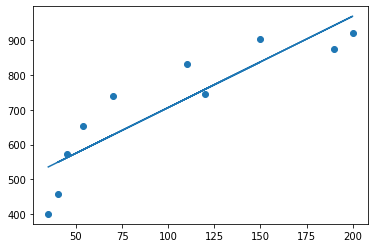

Расчет линейной регрессиии без учета intercept:
Преобразовываем zp в матрицу = [[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]]
Преобразовываем ks в матрицу = [[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]
Дополняем матрицу zp 1 = [[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]
Получаем матрицу коэффициентов b = [[444.17735732]
 [  2.62053888]]
Среднеквадратичная ошибка mse =  203763.939


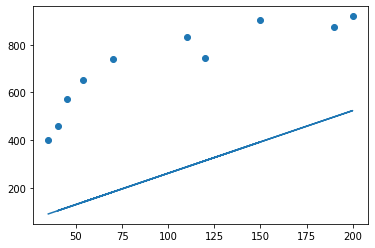

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
a = np.mean(ks) - b * np.mean(zp)
y_hat = a + b * zp
mse = ((ks - y_hat)**2).sum()/n
print(f'Расчет линейной регрессиии с учетом intercept:')
print(f'Коэффициент a = {a: .3f}; Коэффициент b = {b: .3f};\n Линейная модель y_hat = {y_hat}')
print(f'Среднеквадратичная ошибка mse = {mse: .3f}')
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()
print(f'Расчет линейной регрессиии без учета intercept:')
zp2 = zp.reshape(10,1)
ks1 = ks.reshape(10,1)
zp1 = np.hstack([np.ones((10,1)), zp2])
b = np.dot(np.linalg.inv(np.dot(zp1.T, zp1)), zp1.T@ks1)
y_hat =b[1] * zp
mse = ((ks - y_hat)**2).sum()/n
print(f'Преобразовываем zp в матрицу = {zp2}')
print(f'Преобразовываем ks в матрицу = {ks1}')
print(f'Дополняем матрицу zp 1 = {zp1}')
print(f'Получаем матрицу коэффициентов b = {b}')
print(f'Среднеквадратичная ошибка mse = {mse: .3f}')
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Итерация: 0, B1 = 0.25952808, mse = 493237.7212546963
Итерация: 100, B1 = 5.54537842245223, mse = 58151.31823171113
Итерация: 200, B1 = 5.868748638669329, mse = 56522.97550129376
Итерация: 300, B1 = 5.888531320728348, mse = 56516.88130936019
Итерация: 400, B1 = 5.8897415574471985, mse = 56516.85850140053
Итерация: 500, B1 = 5.889815595583751, mse = 56516.858416040064
Итерация: 600, B1 = 5.889820124983314, mse = 56516.85841572062
Итерация: 700, B1 = 5.889820402076462, mse = 56516.85841571941
Итерация: 800, B1 = 5.88982041902807, mse = 56516.8584157194
Итерация: 900, B1 = 5.889820420065112, mse = 56516.85841571941
Итерация: 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Итерация: 1100, B1 = 5.889820420132437, mse = 56516.85841571943
Итерация: 1200, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация: 1300, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация: 1400, B1 = 5.889820420132673, mse = 56516.85841571943


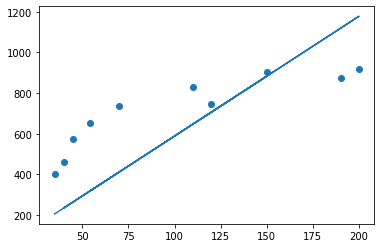

In [4]:
def mse_(B1, y=ks, X=zp, n=10):
    return np.sum((B1*X-y)**2)/n

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
B1 = 0.1
n=10

for i in range(1500):
    B1 -=alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%100==0:
        print(f'Итерация: {i}, B1 = {B1}, mse = {mse_(B1)}')
        
y_hat = B1 * zp
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

3. * (необязательная)Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Итерация: 0, A1 = 683.583852688; B1 = 0.25952808, mse = 493237.7212546963
Итерация: 100, A1 = 147.5986279633438; B1 = 5.54537842245223, mse = 58151.31823171113
Итерация: 200, A1 = 114.80888803892992; B1 = 5.868748638669329, mse = 56522.97550129376
Итерация: 300, A1 = 112.80292407814545; B1 = 5.888531320728348, mse = 56516.88130936019
Итерация: 400, A1 = 112.68020607485403; B1 = 5.8897415574471985, mse = 56516.85850140053
Итерация: 500, A1 = 112.67269860780766; B1 = 5.889815595583751, mse = 56516.858416040064
Итерация: 600, A1 = 112.67223932669197; B1 = 5.889820124983314, mse = 56516.85841572062
Итерация: 700, A1 = 112.6722112294467; B1 = 5.889820402076462, mse = 56516.85841571941
Итерация: 800, A1 = 112.67220951055367; B1 = 5.88982041902807, mse = 56516.8584157194
Итерация: 900, A1 = 112.67220940539755; B1 = 5.889820420065112, mse = 56516.85841571941
Итерация: 1000, A1 = 112.67220939896447; B1 = 5.8898204201285544, mse = 56516.85841571941
Итерация: 1100, A1 = 112.67220939857089; B1 = 5

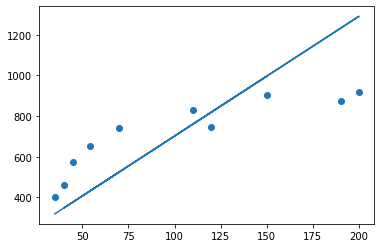

In [5]:
def mse_(B1, y=ks, X=zp, n=10):
    return np.sum((B1*X-y)**2)/n

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
B1 = 0.1
n=10

for i in range(1500):
    B1 -=alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    A1 = ks.sum()/n - B1*(zp.sum()/n)
    if i%100==0:
        print(f'Итерация: {i}, A1 = {A1}; B1 = {B1}, mse = {mse_(B1)}')

y_hat = A1 + B1 * zp
mse = ((ks - y_hat)**2).sum()/n
print(f'Среднеквадратичная ошибка mse = {mse: .3f}')
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()